1) Load Dependencies

In [2]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

2) Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("resume_data.csv")

# Display first few rows
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


3) Check for Missing Values

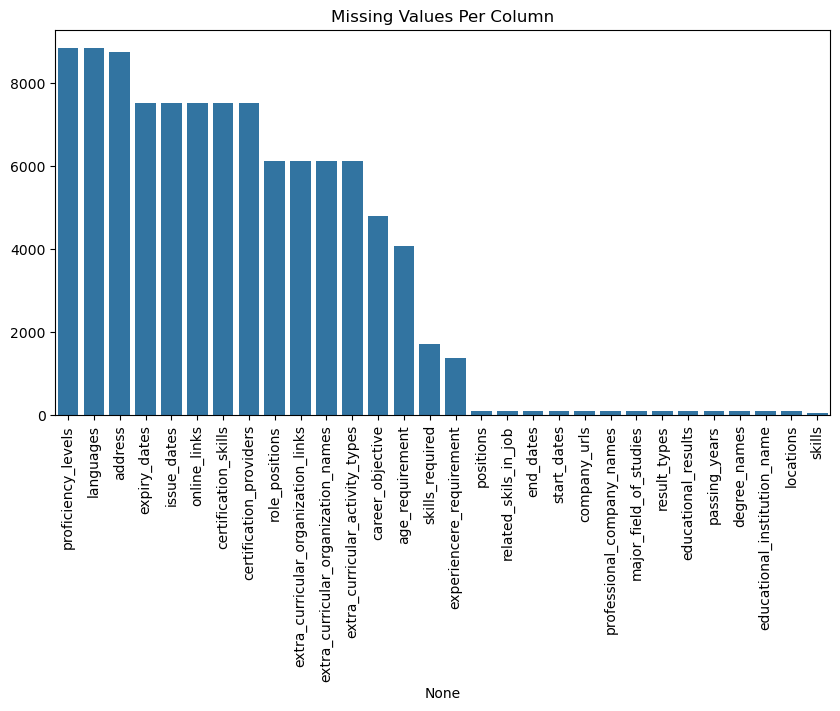

proficiency_levels                     8844
languages                              8844
address                                8760
expiry_dates                           7536
issue_dates                            7536
online_links                           7536
certification_skills                   7536
certification_providers                7536
role_positions                         6118
extra_curricular_organization_links    6118
extra_curricular_organization_names    6118
extra_curricular_activity_types        6118
career_objective                       4804
age_requirement                        4087
skills_required                        1701
experiencere_requirement               1364
positions                                84
related_skils_in_job                     84
end_dates                                84
start_dates                              84
company_urls                             84
professional_company_names               84
major_field_of_studies          

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values Per Column")
plt.show()

# Display missing values count
missing_values

4) Drop Useless Columns (>70% missing)

In [5]:
# Drop columns that are mostly empty (more than 70% missing)
cols_to_drop = missing_values[missing_values > 0.7 * df.shape[0]].index
df.drop(columns=cols_to_drop, inplace=True)

# Show remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   career_objective                     4740 non-null   object 
 1   skills                               9488 non-null   object 
 2   educational_institution_name         9460 non-null   object 
 3   degree_names                         9460 non-null   object 
 4   passing_years                        9460 non-null   object 
 5   educational_results                  9460 non-null   object 
 6   result_types                         9460 non-null   object 
 7   major_field_of_studies               9460 non-null   object 
 8   professional_company_names           9460 non-null   object 
 9   company_urls                         9460 non-null   object 
 10  start_dates                          9460 non-null   object 
 11  end_dates                     

5) Handle Missing Values

In [6]:
df['career_objective'].fillna("Not Provided", inplace=True)
df['skills'].fillna("No skills listed", inplace=True)
df['educational_institution_name'].fillna("Unknown Institution", inplace=True)
df['degree_names'].fillna("Unknown Degree", inplace=True)
df['major_field_of_studies'].fillna("Not Specified", inplace=True)

# Drop rows where critical fields are missing
df.dropna(subset=['﻿job_position_name','skills_required'], inplace=True)

6) Create resume_text columns for ML Model

In [7]:
# Combine relevant text fields into one
df['resume_text'] = df['career_objective'] + " " + df['skills'] + " " + df['major_field_of_studies']
df['resume_text'].head()

2    Not Provided ['Software Development', 'Machine...
3    To obtain a position in a fast-paced business ...
4    Professional accountant with an outstanding wo...
5    To secure an IT specialist, desktop support, n...
6    Not Provided ['Machine Learning', 'Linear Regr...
Name: resume_text, dtype: object

7. Clean Resume Text for ML

In [8]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['resume_text'] = df['resume_text'].apply(clean_text)

8. Convert Job Categories to Numerical Labels

In [9]:
df['category'] = df['﻿job_position_name'].astype('category').cat.codes
# Save category mapping for later use
category_mapping = dict(enumerate(df['﻿job_position_name'].astype('category').cat.categories))
pd.Series(category_mapping).to_csv("category_mapping.csv", index=True)

df[['﻿job_position_name', 'category']].head()

,﻿job_position_name,category
2,"Executive/ Senior Executive- Trade Marketing, ...",9
3,Business Development Executive,2
4,Senior iOS Engineer,19
5,AI Engineer,0
6,Senior iOS Engineer,19


In [12]:
df['﻿job_position_name'].value_counts()

job_position_name
Site Engineer                                                                              342
Civil Engineer                                                                             342
HR Officer                                                                                 342
Project Coordinator (Civil)                                                                342
Business Development Executive                                                             341
Marketing Officer                                                                          341
Manager- Human Resource Management (HRM)\n                                                 341
Head of Internal Control & Compliance (ICC) - SEVP/DMD                                     341
Management Trainee - Mechanical                                                            341
Sr.Officer / Executive - Internal Audit                                                    341
Executive/ Senior Executive- Tra

9. Save Cleaned Dataset

In [10]:
df.to_csv("cleaned_resume_data.csv", index=False)
print("✅ Cleaned dataset saved as `cleaned_resume_data.csv`!")

✅ Cleaned dataset saved as `cleaned_resume_data.csv`!
